# Example 0.1: plain erddappy

Copied from the [errdappy intro](https://ioos.github.io/erddapy/quick_intro-output.html#Longer-introduction)

In [5]:
from erddapy import ERDDAP


e = ERDDAP(
    server="https://gliders.ioos.us/erddap",
    protocol="tabledap",
    response="csv",
)
e.dataset_id = "whoi_406-20160902T1700"

e.variables = [
    "depth",
    "latitude",
    "longitude",
    "salinity",
    "temperature",
    "time",
]

e.constraints = {
    "time>=": "2016-07-10T00:00:00Z",
    "time<=": "2017-02-10T00:00:00Z",
    "latitude>=": 38.0,
    "latitude<=": 41.0,
    "longitude>=": -72.0,
    "longitude<=": -69.0,
}


In [2]:
df = e.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
).dropna()

df.head()

,depth (m),latitude (degrees_north),longitude (degrees_east),salinity (1),temperature (Celsius)
time (UTC),,,,,
2016-09-03 20:15:46+00:00,5.35,40.990881,-71.12439,32.245422,20.6620
2016-09-03 20:15:46+00:00,6.09,40.990881,-71.12439,32.223183,20.6512
2016-09-03 20:15:46+00:00,6.72,40.990881,-71.12439,32.237950,20.6047
2016-09-03 20:15:46+00:00,7.37,40.990881,-71.12439,32.235470,20.5843
2016-09-03 20:15:46+00:00,8.43,40.990881,-71.12439,32.224503,20.5691


# Example 0.2: class wrapping erddapy
Emulating the UI of [argopy](https://github.com/euroargodev/argopy)

In [6]:
class GliderDataFetcher(object):
    """ Fetch glider data
    Currently harcoded to search oos server only
    Default variables and glider dataset id provided
    """

    def __init__(self,
                 mode: str = "",
                 src: str = "",
                 ds: str = "",
                 **fetcher_kwargs):
        self.fetcher = ERDDAP(
                       server="https://gliders.ioos.us/erddap",
                       protocol="tabledap",
                       response="csv",
                       )
        self.fetcher.variables = [
                            "depth",
                            "latitude",
                            "longitude",
                            "salinity",
                            "temperature",
                            "time",
                            ]
        self.fetcher.dataset_id = "whoi_406-20160902T1700"

In [7]:
glider_grab = GliderDataFetcher()

df = glider_grab.fetcher.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
).dropna()

df.head()

,depth (m),latitude (degrees_north),longitude (degrees_east),salinity (1),temperature (Celsius)
time (UTC),,,,,
2016-09-02 17:05:38+00:00,6.43,41.120018,-71.017118,32.079258,20.5407
2016-09-02 17:05:38+00:00,7.82,41.120018,-71.017118,32.095406,20.5071
2016-09-02 17:05:38+00:00,8.69,41.120018,-71.017118,32.111920,20.4904
2016-09-02 17:05:38+00:00,9.54,41.120018,-71.017118,32.126587,20.4897
2016-09-02 17:05:38+00:00,10.32,41.120018,-71.017118,32.140717,20.4909


Try with a different datset

In [5]:
glider_grab = GliderDataFetcher()
glider_grab.fetcher.dataset_id = "sp022-20170209T1616"

df = glider_grab.fetcher.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
).dropna()

df.head()

,depth (m),latitude (degrees_north),longitude (degrees_east),salinity (1),temperature (Celsius)
time (UTC),,,,,
2017-02-09 17:44:45+00:00,103.299385,25.77845,-80.03365,35.982,18.032
2017-02-09 17:44:45+00:00,102.187210,25.77845,-80.03365,36.000,18.274
2017-02-09 17:44:45+00:00,101.194190,25.77845,-80.03365,36.073,19.066
2017-02-09 17:44:45+00:00,100.161446,25.77845,-80.03365,36.155,20.375
2017-02-09 17:44:45+00:00,99.049250,25.77845,-80.03365,36.201,20.980


# Example 0.3: implement time and space constraints
we can make a direct call to erddapy's `constraints`, this isn't very elegant though

In [6]:
glider_grab = GliderDataFetcher()
glider_grab.fetcher.constraints = {
    "time>=": "2016-07-10T00:00:00Z",
    "time<=": "2016-09-15T00:00:00Z",
    "latitude>=": 38.0,
    "latitude<=": 41.0,
    "longitude>=": -72.0,
    "longitude<=": -69.0,
}

df = glider_grab.fetcher.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
).dropna()

df.tail()

,depth (m),latitude (degrees_north),longitude (degrees_east),salinity (1),temperature (Celsius)
time (UTC),,,,,
2016-09-14 23:44:32+00:00,6.32,40.525497,-70.701245,33.610584,20.5324
2016-09-14 23:44:32+00:00,5.82,40.525497,-70.701245,33.302277,20.3212
2016-09-14 23:44:32+00:00,5.31,40.525497,-70.701245,33.191547,20.2575
2016-09-14 23:44:32+00:00,4.82,40.525497,-70.701245,33.163350,20.2238
2016-09-14 23:44:32+00:00,4.16,40.525497,-70.701245,33.141460,20.2059


Let's try making a method of the class to do this more neatly

In [7]:
from dateutil.parser import parse
def time_parse(time_string):
    """Takes a time string and returns an ISO 8601 timestamp with a Z for erddappy
    """
    dt_object = parse(time_string)
    time_iso_string = dt_object.isoformat() + 'Z'
    return time_iso_string

In [8]:
class GliderDataFetcher(object):
    """ Fetch glider data
    Currently harcoded to search oos server only
    Default variables and glider dataset id provided
    """

    def __init__(self,
                 mode: str = "",
                 src: str = "",
                 ds: str = "",
                 **fetcher_kwargs):
        self.fetcher = ERDDAP(
                       server="https://gliders.ioos.us/erddap",
                       protocol="tabledap",
                       response="csv",
                       )
        self.fetcher.variables = [
                            "depth",
                            "latitude",
                            "longitude",
                            "salinity",
                            "temperature",
                            "time",
                            ]
        self.fetcher.dataset_id = "whoi_406-20160902T1700"
    def query(self, min_lat, max_lat, min_lon, max_lon, start_time, end_time):
        """Takes user supplied geographical and time constraints and adds them to the query
        """
        self.fetcher.constraints = {
            "time>=": time_parse(start_time),
            "time<=": time_parse(end_time),
            "latitude>=": min_lat,
            "latitude<=": max_lat,
            "longitude>=": min_lon,
            "longitude<=": max_lon,
        }
        return self


In [9]:
glider_grab = GliderDataFetcher()
glider_grab.query(10,40.5,-71,180,"2016-08-1","2016-09-18")
df = glider_grab.fetcher.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
).dropna()

df.tail()

,depth (m),latitude (degrees_north),longitude (degrees_east),salinity (1),temperature (Celsius)
time (UTC),,,,,
2016-09-14 19:47:17+00:00,6.55,40.4852,-70.725977,33.753006,20.6421
2016-09-14 19:47:17+00:00,6.08,40.4852,-70.725977,33.700924,20.6298
2016-09-14 19:47:17+00:00,5.31,40.4852,-70.725977,33.303110,20.3098
2016-09-14 19:47:17+00:00,4.78,40.4852,-70.725977,33.206260,20.2528
2016-09-14 19:47:17+00:00,4.27,40.4852,-70.725977,33.144120,20.2475


In [10]:
df.describe()

,depth (m),latitude (degrees_north),longitude (degrees_east),salinity (1),temperature (Celsius)
count,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000
mean,48.104011,40.330550,-70.822763,34.125363,14.853269
std,26.688218,0.062990,0.094037,0.585665,3.558699
min,3.390000,40.257794,-70.989772,33.094920,10.879200
25%,24.815000,40.285858,-70.928671,33.745123,12.222950
50%,47.100000,40.305604,-70.778022,33.983704,13.035800
75%,70.570000,40.374791,-70.737226,34.487814,18.871250
max,98.050000,40.485200,-70.721563,36.438515,21.398500


# Example 0.4 find glider datasets on server

In [11]:
import pandas as pd
class DatasetList():
    """ Search servers for glider dataset ids. Defaults to the string "glider"
    """

    def __init__(self):
        self.e =  ERDDAP(
                   server="https://gliders.ioos.us/erddap",
                   protocol="tabledap",
        )
        self.search_terms = ["glider"]
    def get_ids(self):
        """Search the database using a user supplied list of strings
        """
        dataset_ids = pd.Series(dtype=str)
        for term in self.search_terms:
            url = self.e.get_search_url(search_for=term, response="csv")
            dataset_ids = dataset_ids.append(pd.read_csv(url)["Dataset ID"], ignore_index=True)
            dataset_ids_uniq = dataset_ids.str.split(';',expand=True).stack().unique()
        self.dataset_ids = pd.read_csv(url)["Dataset ID"]
        return self.dataset_ids

Calling get_ids from the class searches for all databases tagged as glider

In [12]:
datasets = DatasetList()
datasets.get_ids()

0                         allDatasets
1                unit_4-20140910T1800
2              unit_191-20150711T2000
3              unit_191-20160710T2018
4      unit_595-20170713T1730-delayed
                    ...              
748      ce_386-20140420T1947-delayed
749      ce_386-20150404T1729-delayed
750      ce_386-20151011T2247-delayed
751            Reveille-20170925T0946
752                ru22-20191014T1645
Name: Dataset ID, Length: 753, dtype: object

Let's look for the ones from UW

In [13]:
datasets = DatasetList()
datasets.search_terms = ["UW"]
uw_glider_ids = datasets.get_ids()
uw_glider_ids

0                UW130-20150309T2005
1                UW130-20160523T1828
2                UW130-20170605T1834
3                UW130-20181107T0000
4                UW130-20200615T0000
5                UW157-20141116T2118
6                UW157-20150917T1833
7                UW157-20161021T1807
8                UW157-20180417T1832
9                UW157-20190916T0000
10               UW646-20190409T0000
11            unit_191-20160710T2018
12    unit_595-20170713T1730-delayed
13     nokomis-20140912T1739-delayed
14     nokomis-20180727T1911-delayed
15               SG187-20110430T1450
16               SG108-20130923T1728
17               SG187-20100716T1208
18               SG187-20140625T1330
19               SG187-20120912T1125
Name: Dataset ID, dtype: object

We'll pass that id back into our original data fetcher

In [ ]:
uw_grab = GliderDataFetcher()
uw_grab.fetcher.dataset_id = uw_glider_ids[18]

df = uw_grab.fetcher.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
).dropna()

df.head()

## Example 0.5 Now let's plot the track map for a dataset

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


def plot_track(df):
    x = df["longitude (degrees_east)"]
    y = df["latitude (degrees_north)"]
    dx, dy = 2, 4

    fig, ax = plt.subplots(
        figsize=(9, 9), subplot_kw={"projection": ccrs.PlateCarree()}
    )
    cs = ax.scatter(
        x, y, c=df["temperature (Celsius)"], s=50, alpha=0.5, edgecolor="none"
    )
    cbar = fig.colorbar(
        cs, orientation="vertical", fraction=0.1, shrink=0.9, extend="both"
    )
    ax.coastlines("10m")
    ax.set_extent([x.min() - dx, x.max() + dx, y.min() - dy, y.max() + dy])
    return fig, ax

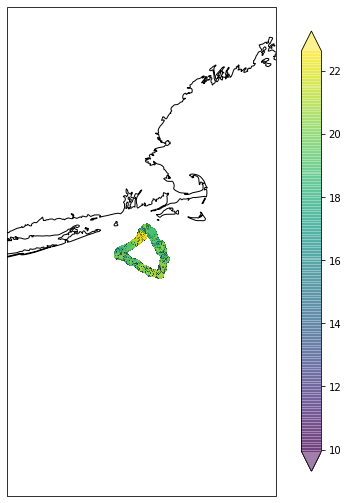

In [9]:
fig, ax = plot_track(df) # plot glider track

<bound method DataFrame.items of                            depth (m)  latitude (degrees_north)  \
time (UTC)                                                       
2016-09-02 17:05:38+00:00       6.43                 41.120018   
2016-09-02 17:05:38+00:00       7.82                 41.120018   
2016-09-02 17:05:38+00:00       8.69                 41.120018   
2016-09-02 17:05:38+00:00       9.54                 41.120018   
2016-09-02 17:05:38+00:00      10.32                 41.120018   
...                              ...                       ...   
2016-09-20 13:32:33+00:00       5.19                 41.048109   
2016-09-20 13:32:33+00:00       4.82                 41.048109   
2016-09-20 13:32:33+00:00       4.44                 41.048109   
2016-09-20 13:32:33+00:00       4.06                 41.048109   
2016-09-20 13:32:33+00:00       3.52                 41.048109   

                           longitude (degrees_east)  salinity (1)  \
time (UTC)                             

## Now the transect for a given variable in that dataset

In [21]:
var = "salinity (1)"

In [22]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import palettable
from palettable.cmocean.sequential import Thermal_20

cmap = Thermal_20.mpl_colormap


def plot_transect(df,var):
    fig, ax = plt.subplots(figsize=(17, 2))
    cs = ax.scatter(
        df.index,
        df["depth (m)"],
        s=15,
        c=df[var],
        marker="o",
        edgecolor="none",
        cmap=cmap,
    )

    ax.invert_yaxis()
    xfmt = mdates.DateFormatter("%H:%Mh\n%d-%b")
    ax.xaxis.set_major_formatter(xfmt)

    cbar = fig.colorbar(cs, orientation="vertical", extend="both")
    cbar.ax.set_ylabel(var)
    ax.set_ylabel("Depth (m)")
    return fig, ax

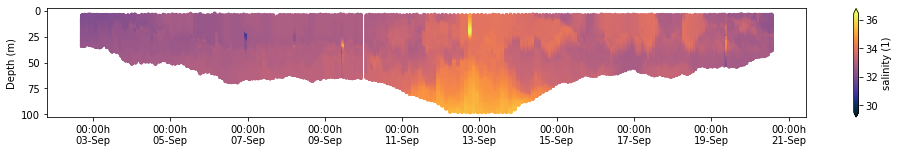

In [23]:
fig, ax = plot_transect(df,var) # glider transect